## Logistic Regression Challenge

In [1]:
#import the required packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

### Task 1: Download the data and load them into Python.
You can find the data [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bX0MzUEhVdmpCc3c/view?usp=sharing&resourcekey=0-BirYbvtYO-hSEt09wpEBRw).

**Note**
- Features and response variables are in different files.
- Be careful about number of spaces between the values in the file.

In [2]:
column_names = pd.read_csv('Smartphone Sensor Data/features.txt', delim_whitespace=True, header=None)
column_names = column_names.drop(0, axis=1)
column_names

,1
0,tBodyAcc-mean()-X
1,tBodyAcc-mean()-Y
2,tBodyAcc-mean()-Z
3,tBodyAcc-std()-X
4,tBodyAcc-std()-Y
...,...
556,"angle(tBodyGyroMean,gravityMean)"
557,"angle(tBodyGyroJerkMean,gravityMean)"
558,"angle(X,gravityMean)"
559,"angle(Y,gravityMean)"


In [3]:
df_x = pd.read_csv('Smartphone Sensor Data/train/X_train.txt', delim_whitespace=True, header=None)
df_x.columns = column_names[1].to_list()

In [4]:
df_x

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [5]:
df_x.isnull().any().any()

False

In [6]:
df_y = pd.read_csv('Smartphone Sensor Data/train/y_train.txt', delim_whitespace=True, header=None)
df_y

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


### Task 2: Create a binary target variable: categories 1,2,3 --> 1, categories 4,5,6 --> 0 
This will represent a binary variable indicating if person is walking or not.

In [7]:
def bin_target(row):
    if row[0] in (1, 2, 3):
        return 1
    elif row[0] in (4, 5, 6):
        return 0

df_y.apply(bin_target, axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
7347    1
7348    1
7349    1
7350    1
7351    1
Length: 7352, dtype: int64

In [8]:
def bin_target(row):
    return row.isin([1,2,3]).astype(int)

df_y = df_y.transform(bin_target, axis=1)

In [9]:
df_y

,0
0,0
1,0
2,0
3,0
4,0
...,...
7347,1
7348,1
7349,1
7350,1


### Task 3

+ Create a Univariate Binary Logistic Regression with feature number 54, which represents `tGravityAcc-min()-Y`: gravity acceleration signals in direction of Y.
+ Compare the results of the Logistic regressions from different Python packages (sklearn, statsmodel).
+ Plot the **fit** of predicted probabilities to the original values.

In [10]:
df_x.iloc[:,53]

0      -0.123213
1      -0.114893
2      -0.114893
3      -0.121336
4      -0.121834
          ...   
7347   -0.234998
7348   -0.234998
7349   -0.216004
7350   -0.210542
7351   -0.212149
Name: tGravityAcc-min()-Y, Length: 7352, dtype: float64

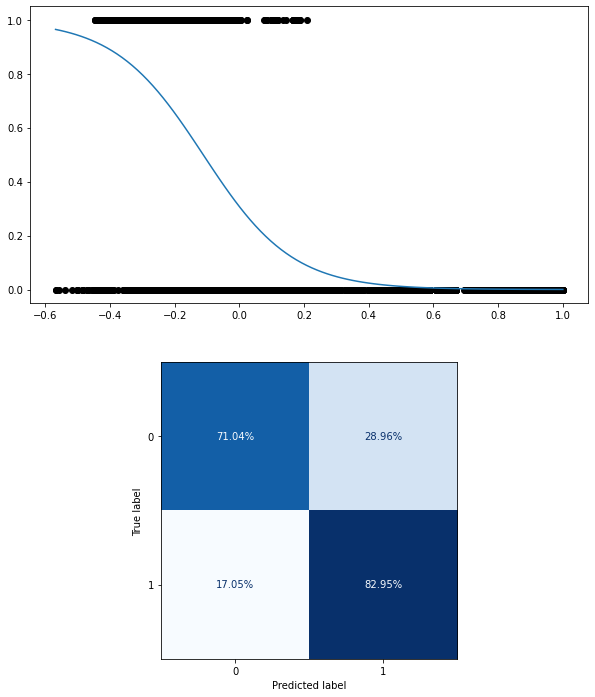

In [16]:
x = df_x.iloc[:,53].values.reshape(-1,1)
y = df_y.values.ravel()

clf = LogisticRegression().fit(x, y)
y_pred = clf.predict(x)
y_prob = clf.predict_proba(x)
x_test = np.linspace(x.min(), x.max(),100).reshape(-1,1)
y_test = clf.predict_proba(x_test)[:,1]

fig, axes = plt.subplots(2,1,figsize=(10,12))


axes[0].scatter(x,y, c='black')
axes[0].plot(x_test,y_test)

ConfusionMatrixDisplay.from_predictions(y, y_pred, ax=axes[1], cmap='Blues', normalize='true', values_format='0.2%',colorbar=False)


### Task 4
- Try to fit a Binary Logistic Regression with all the features? How many are significant?

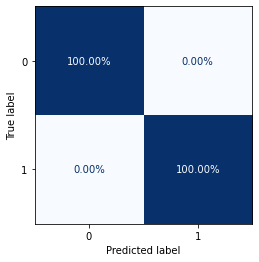

In [14]:
x = df_x.values
y = df_y.values.ravel()

clf = LogisticRegression().fit(x,y)
y_pred = clf.predict(x)



ConfusionMatrixDisplay.from_predictions(y, y_pred, cmap='Blues', colorbar=False, normalize='true', values_format='0.2%')


### Task 5
Now, let's fit Multinomial Logistic regression to predict all categories. Firstly, we can start with **Univariate** model for these features number separately:
+ 4
+ 54
- 19

Check the contingency matrix to see the effect of particular features!! (each feature can be good in predicting different categories)

### Task 6

Fit the Multinomial Logistic Regression model again. Now, try to choose **all** the important features we have in the dataset. Compare with your peers on who will get the best predictions with the smallest number of features?

### Task 7 (Stretch)
Create your own function for Stepwise selection. Use either sklearn or statsmodel.